In [102]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

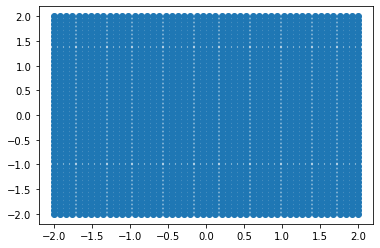

In [359]:
xs = np.linspace(-2, 2, 50)
ys = np.linspace(-2, 2, 50) * 1j
xx, yy = np.meshgrid(xs, ys)
cs = xx + yy
plt.scatter(cs.real, cs.imag)

In [360]:
cs_flat.shape

(400,)

In [361]:
n_iter = 10

cs_flat = cs.reshape(-1)
zs = np.zeros((cs_flat.size, n_iter))

for i in np.arange(1, n_iter):
    zs[:, i] = np.square(zs[:, i-1]) + (cs_flat.real + cs_flat.imag)

In [368]:
divergence = np.where(zs > 1e3, 0, 1).sum(axis=1)

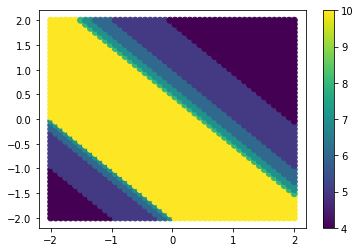

In [370]:
plt.scatter(cs.real, cs.imag, c=divergence)
plt.colorbar()
plt.savefig('q1.png')

In [354]:
## What to use as the threshold for "diverge"?

In [287]:
from scipy.integrate import odeint

In [324]:
def derivatives(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [378]:
N = 1000

s0 = 999
i0 = 1
r0 = 0

y0 = (s0, i0, r0)

t = np.arange(25)

betas = [1.5, 2, 2.5, 3]
gammas = [.8, .85, .9, .95]

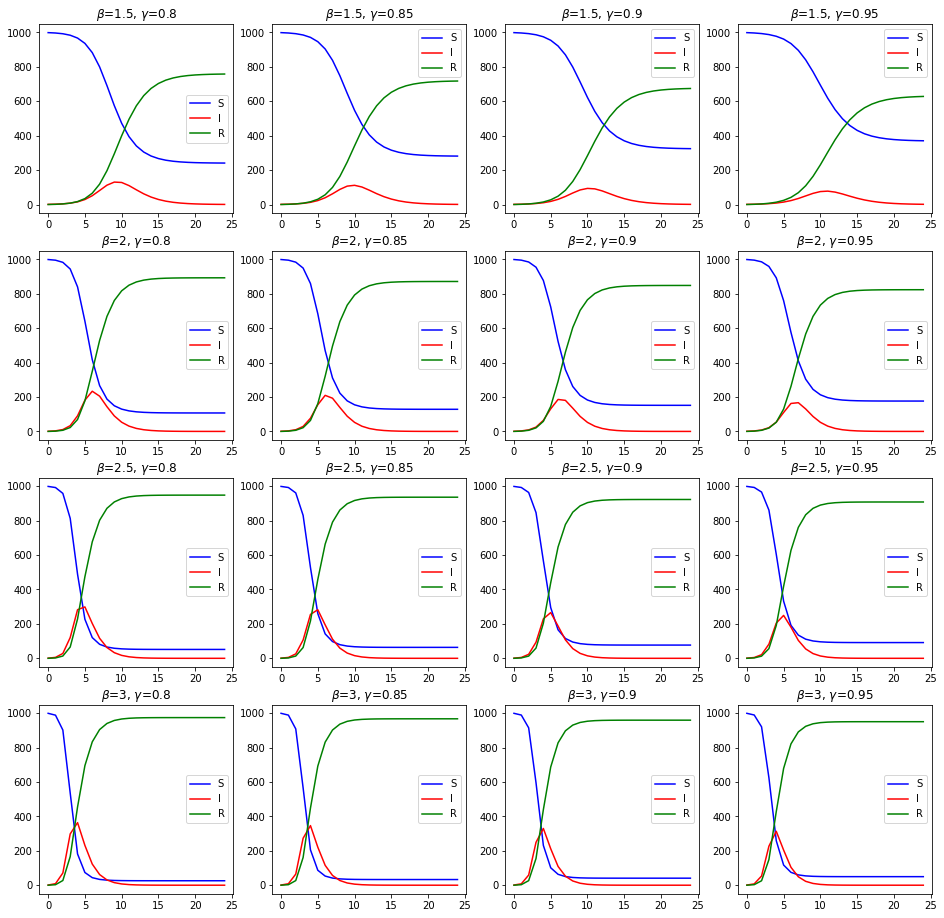

In [379]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for idx_beta, beta in enumerate(betas):
    for idx_gamma, gamma in enumerate(gammas):
        y = odeint(derivatives, y0, t, (beta, gamma, N))
        S, I, R = y[:, 0], y[:, 1], y[:, 2]
        
        ax[idx_beta][idx_gamma].set_title(fr'$\beta$={beta}, $\gamma$={gamma}')
        ax[idx_beta][idx_gamma].plot(t, S, label='S', c='b')
        ax[idx_beta][idx_gamma].plot(t, I, label='I', c='r')
        ax[idx_beta][idx_gamma].plot(t, R, label='R', c='g')
        ax[idx_beta][idx_gamma].legend()

plt.savefig('q2.png')